In [3]:
import os
import seaborn
import pandas as pd
import matplotlib.pyplot as pl
import scipy.constants as constants
from scipy.stats import ks_2samp
pd.options.display.max_rows = 10000
%matplotlib inline

In [4]:
os.listdir('Data/')

['.DS_Store',
 'd05_text_station_5min_2016_08_05.txt',
 'd05_text_station_5min_2016_08_05.txt.gz',
 'output.csv',
 'output_75mslowprob40.csv',
 'output_75mslowprob50.csv',
 'output_75mslowprob60.csv',
 'output_7mslowprob30.csv',
 'output_7mslowprob50.csv',
 'output_7mslowprob60.csv',
 'output_7mslowprob70.csv',
 'output_7mslowprob80.csv']

In [5]:
cols = ['Timestamp', 'Station', 'District', 'FreewayNum', 'Direction', 'LaneType',
        'StationLength', 'Samples', 'PercObs', 'TotalFlow', 'AvgOcc', 'AvgSpeed']
stations = [500010011, 500010021, 500011112, 500011121, 500011131, 500011143, 500011212, 500011222]
df = pd.read_csv('Data/d05_text_station_5min_2016_08_05.txt', usecols=range(12), names=cols)
df = df[df['Station'].isin(stations)]

In [6]:
df.head(2)

,Timestamp,Station,District,FreewayNum,Direction,LaneType,StationLength,Samples,PercObs,TotalFlow,AvgOcc,AvgSpeed
0,08/05/2016 00:00:00,500010011,5,1,N,ML,2.713,10,100,2,0.0026,65.0
2,08/05/2016 00:00:00,500010021,5,1,N,ML,0.697,10,0,20,0.0204,67.0


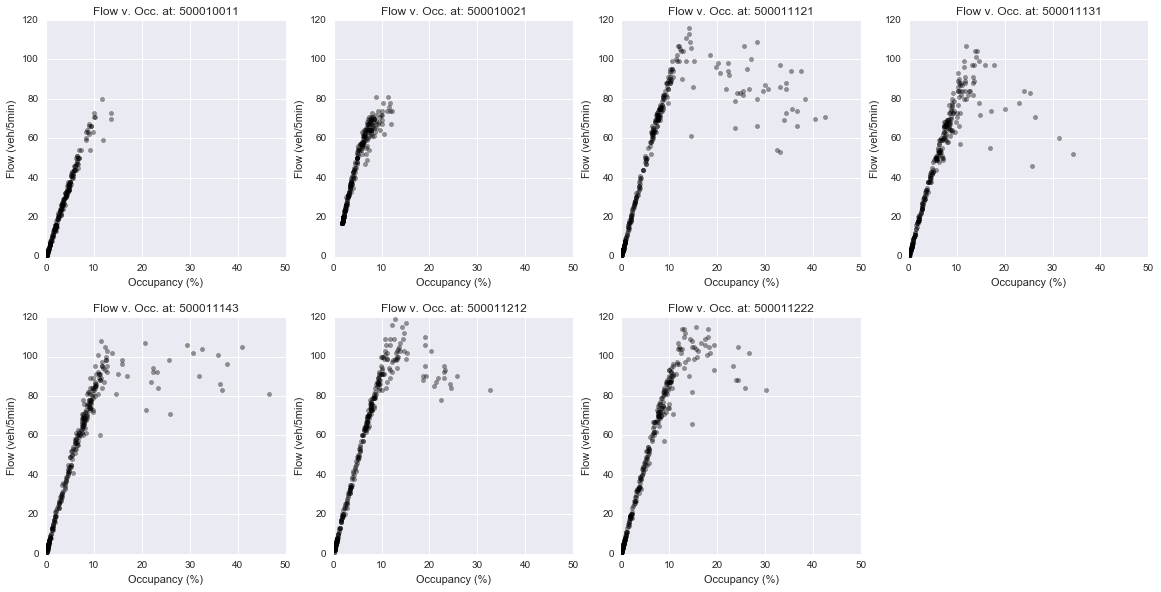

In [7]:
fig, ([ax1, ax2, ax3, ax4],
      [ax5, ax6, ax7, ax8]) = pl.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.tight_layout(w_pad=2, h_pad=4)

for ax, i in zip(fig.axes, df.Station.unique()):
    ax.scatter(df[df['Station'] == i].AvgOcc * 100, df[df['Station'] == i].TotalFlow, label=i, c='k', alpha=0.4)
    ax.set_title('Flow v. Occ. at: '+ str(i))
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 120)
    ax.set_xlabel('Occupancy (%)')
    ax.set_ylabel('Flow (veh/5min)')
fig.delaxes(ax8)

In [8]:
# df[df['Station'] == 500011121].sort_values('AvgOcc')

In [9]:
# Station 500011121: 1 lane, 1.515 miles, 70Mph limit, 

avg_speed = (df[df['Station'] == 500011121].AvgSpeed.mean() * constants.mile) / 1000 # Avg speed (kph).
road_length = 1.515 * constants.mile # Road length (m).

cell_len = 7.5 # Cell length (m).
iter_speed = 4.5 # Avg cell speed per iter.

cell_len * iter_speed * 3600 / 1000

cell_counts = road_length / cell_len
cell_counts

325.08748799999995

In [10]:
data = {}

for i in os.listdir('Data/'):
    if i.startswith('output'):
        data[i[:-4]] = pd.read_csv('Data/' + i, names=['Flow', 'AvgOcc'])

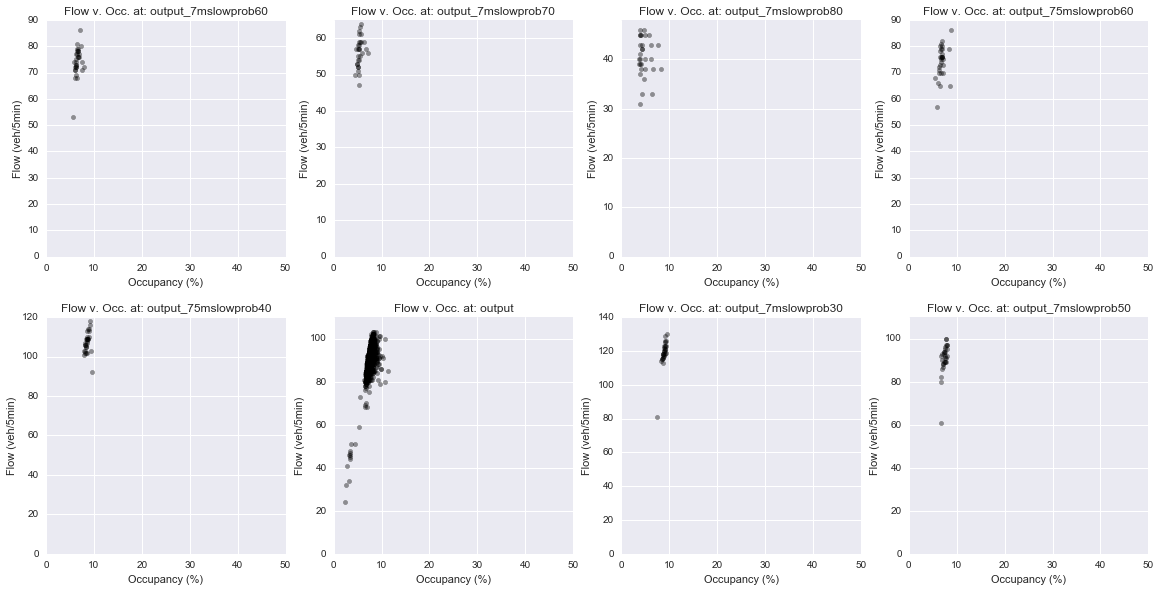

In [11]:
fig, ([ax1, ax2, ax3, ax4],
      [ax5, ax6, ax7, ax8]) = pl.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.tight_layout(w_pad=2, h_pad=4)

for ax, i in zip(fig.axes, data.keys()):
    d = data[i]
    ax.scatter(d['AvgOcc'], d['Flow'], label=i, c='k', alpha=0.4)
    ax.set_title('Flow v. Occ. at: '+ str(i))
    ax.set_xlim(0, 50)
    ax.set_ylim(0)
    ax.set_xlabel('Occupancy (%)')
    ax.set_ylabel('Flow (veh/5min)')
# fig.delaxes(ax8)

In [12]:
os.listdir('.')
data_output = pd.read_csv('Nagel-Schreckenberg-simulation-master/output.csv',
                          names=['flow', 'occ', 'avgspeed'], usecols=[0,1,2])
data_output.head(2)

,flow,occ,avgspeed
0,23,2.409227,4.46943
1,49,3.330347,4.478023333


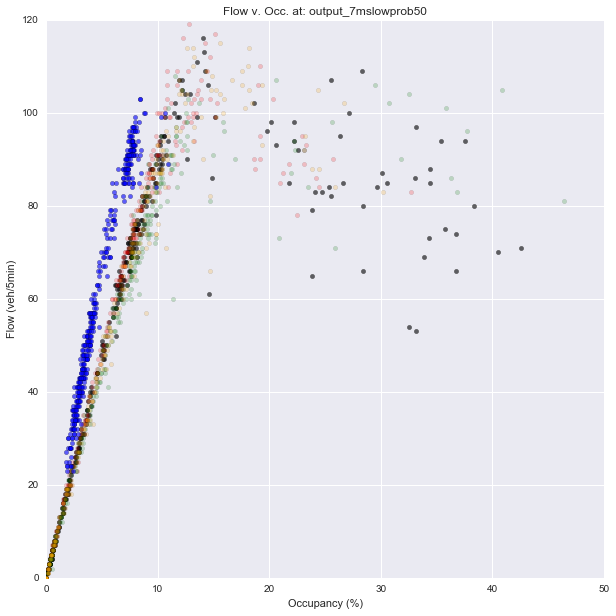

In [15]:
fig, (ax1) = pl.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax1.scatter(df[df['Station'] == 500011121].AvgOcc * 100, 
           df[df['Station'] == 500011121].TotalFlow, label=i, c='k', alpha=0.6)
ax1.scatter(df[df['Station'] == 500011212].AvgOcc * 100, 
           df[df['Station'] == 500011212].TotalFlow, label=i, c='r', alpha=0.2)
ax1.scatter(df[df['Station'] == 500011143].AvgOcc * 100, 
           df[df['Station'] == 500011143].TotalFlow, label=i, c='g', alpha=0.2)
ax1.scatter(df[df['Station'] == 500011222].AvgOcc * 100, 
           df[df['Station'] == 500011222].TotalFlow, label=i, c='orange', alpha=0.2)
ax1.scatter(data_output.occ, data_output.flow, c='b', alpha=0.6)

for ax in fig.axes:
    ax.set_title('Flow v. Occ. at: '+ str(i))
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 120)
    ax.set_xlabel('Occupancy (%)')
    ax.set_ylabel('Flow (veh/5min)')

In [46]:
ks_2samp(df[df['Station'] == 500011121].TotalFlow,
         data_output.flow)

Ks_2sampResult(statistic=0.27348548297040759, pvalue=1.6943719108892088e-11)